## Downloading the dataset

In [1]:
import kagglehub
import os
cur_dir = os.getcwd()
path = kagglehub.dataset_download("sidharth178/disaster-response-messages")
datasets = os.listdir(path)

c:\Users\Leonid\anaconda3\envs\dlearn_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Loading and inspecting the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
categories = pd.read_csv(os.path.join(path, datasets[0]))
messages = pd.read_csv(os.path.join(path, datasets[1]))

labels = [label.split("-")[0] for label in categories["categories"][0].split(";")]
categories[labels] = categories["categories"].apply(lambda x: pd.Series(int(label.split("-")[1]) for label in x.split(";")))
categories.drop("categories", inplace=True, axis=1)

display(messages.head(5))
display(categories.head(5))

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


,id,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,1,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Information about messages dataset, NA counts, duplicated counts

In [4]:
display(messages.info())
print("NA count separately:")
display(messages.isna().sum())
print("Duplicated count:")
display(messages.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        26248 non-null  int64 
 1   message   26248 non-null  object
 2   original  10184 non-null  object
 3   genre     26248 non-null  object
dtypes: int64(1), object(3)
memory usage: 820.4+ KB


None

NA count separately:


id              0
message         0
original    16064
genre           0
dtype: int64

Duplicated count:


68

Information about categories dataset, NA counts, duplicated counts

In [5]:
display(categories.info())
print("NA count separately:")
display(categories.isna().sum())
print("Duplicated count:")
display(categories.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   id                      26248 non-null  int64
 1   related                 26248 non-null  int64
 2   request                 26248 non-null  int64
 3   offer                   26248 non-null  int64
 4   aid_related             26248 non-null  int64
 5   medical_help            26248 non-null  int64
 6   medical_products        26248 non-null  int64
 7   search_and_rescue       26248 non-null  int64
 8   security                26248 non-null  int64
 9   military                26248 non-null  int64
 10  child_alone             26248 non-null  int64
 11  water                   26248 non-null  int64
 12  food                    26248 non-null  int64
 13  shelter                 26248 non-null  int64
 14  clothing                26248 non-null  int64
 15  money              

None

NA count separately:


id                        0
related                   0
request                   0
offer                     0
aid_related               0
medical_help              0
medical_products          0
search_and_rescue         0
security                  0
military                  0
child_alone               0
water                     0
food                      0
shelter                   0
clothing                  0
money                     0
missing_people            0
refugees                  0
death                     0
other_aid                 0
infrastructure_related    0
transport                 0
buildings                 0
electricity               0
tools                     0
hospitals                 0
shops                     0
aid_centers               0
other_infrastructure      0
weather_related           0
floods                    0
storm                     0
fire                      0
earthquake                0
cold                      0
other_weather       

Duplicated count:


32

Half of messages are missing "original", most likely, since they have been already in english, so they are not translated, but data seem to be in good quality, there are 68 duplicated messages and 32 duplicated category labelings, category lablelings don't have missing values at all.

In [6]:
display(messages.loc[messages["original"].isna(),:].head(5))

,id,message,original,genre
7433,8365,NOTES: It mark as not enough information,NaN,direct
9902,11186,My thoughts and prayers go out to all the live...,NaN,social
9903,11188,I m sorry for the poor people in Haiti tonight...,NaN,social
9904,11189,RT selenagomez UNICEF has just announced an em...,NaN,social
9905,11192,lilithia yes 5.2 magnitude earthquake hit mani...,NaN,social


In [7]:
print("Couple of duplicated messages: ")
display(messages.loc[messages.duplicated(),:].head(5))
print("Couple of duplicated category labellings: ")
display(categories.loc[categories.duplicated(),:].head(5))

Couple of duplicated messages: 


,id,message,original,genre
163,202,?? port au prince ?? and food. they need gover...,p bay pap la syen ak manje. Yo bezwen ed gouve...,direct
656,804,elle est vraiment malade et a besoin d'aide. u...,she is really sick she need your help. please ...,direct
710,862,What is the address of the radio station? I as...,Ki adres radyo a? Paske m bezwen al depoze dos...,direct
1408,1652,"please we need water, food and tents, we have ...","p jwen dlo, manje, tant pou nou demi nou gen 1...",direct
2131,2446,How much money did TV Latino American collect ...,Konbyen kob tv latino america ranmase miami,direct


Couple of duplicated category labellings: 


,id,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
656,804,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2131,2446,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2793,3217,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3852,4412,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4630,5265,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Unique values in category labellings

Category child alone contains only 1 unique value, so it can be dropped

In [8]:
display(categories[categories.columns[1:]].nunique())
categories.drop("child_alone", inplace=True, axis=1)
display((categories["related"] == 2).sum())

related                   3
request                   2
offer                     2
aid_related               2
medical_help              2
medical_products          2
search_and_rescue         2
security                  2
military                  2
child_alone               1
water                     2
food                      2
shelter                   2
clothing                  2
money                     2
missing_people            2
refugees                  2
death                     2
other_aid                 2
infrastructure_related    2
transport                 2
buildings                 2
electricity               2
tools                     2
hospitals                 2
shops                     2
aid_centers               2
other_infrastructure      2
weather_related           2
floods                    2
storm                     2
fire                      2
earthquake                2
cold                      2
other_weather             2
direct_report       

193

Not sure why there are some messages which have value 2 in "related" this is not mentioned in data card, i guess it might be somehow connected to duplicated count, or some labelling mistake, we can drop duplicates and join datasets by id, replace labels 2 in "related" by value 1

In [9]:
messages.drop_duplicates(inplace=True)
categories.drop_duplicates(inplace=True)
categories["related"] = categories["related"].replace(2, 1)

In [10]:
dataset = messages.merge(categories, on ="id", how = "inner")
dataset.drop("original", axis=1, inplace=True)
display(dataset.head(5))
print("Double check NA:")
display(dataset.isna().sum().sum())
print("Double check duplicated:")
display(dataset.duplicated().sum())
print("Size of final dataset:")
print(len(dataset))

,id,message,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,direct,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Double check NA:


0

Double check duplicated:


1

Size of final dataset:
26216


Our dataset is now ready to work with.

### Brief EDA

### Number of messages in each category and and top 10 most frequent. 

Messages assigned to an individual category:


related                   20094
aid_related               10860
weather_related            7297
direct_report              5075
request                    4474
other_aid                  3446
food                       2923
earthquake                 2455
storm                      2443
shelter                    2314
floods                     2155
medical_help               2084
infrastructure_related     1705
water                      1672
other_weather              1376
buildings                  1333
medical_products           1313
transport                  1201
death                      1194
other_infrastructure       1151
refugees                    875
military                    860
search_and_rescue           724
money                       604
electricity                 532
cold                        530
security                    471
clothing                    405
aid_centers                 309
missing_people              298
hospitals                   283
fire    

Total count of label assignments


83135

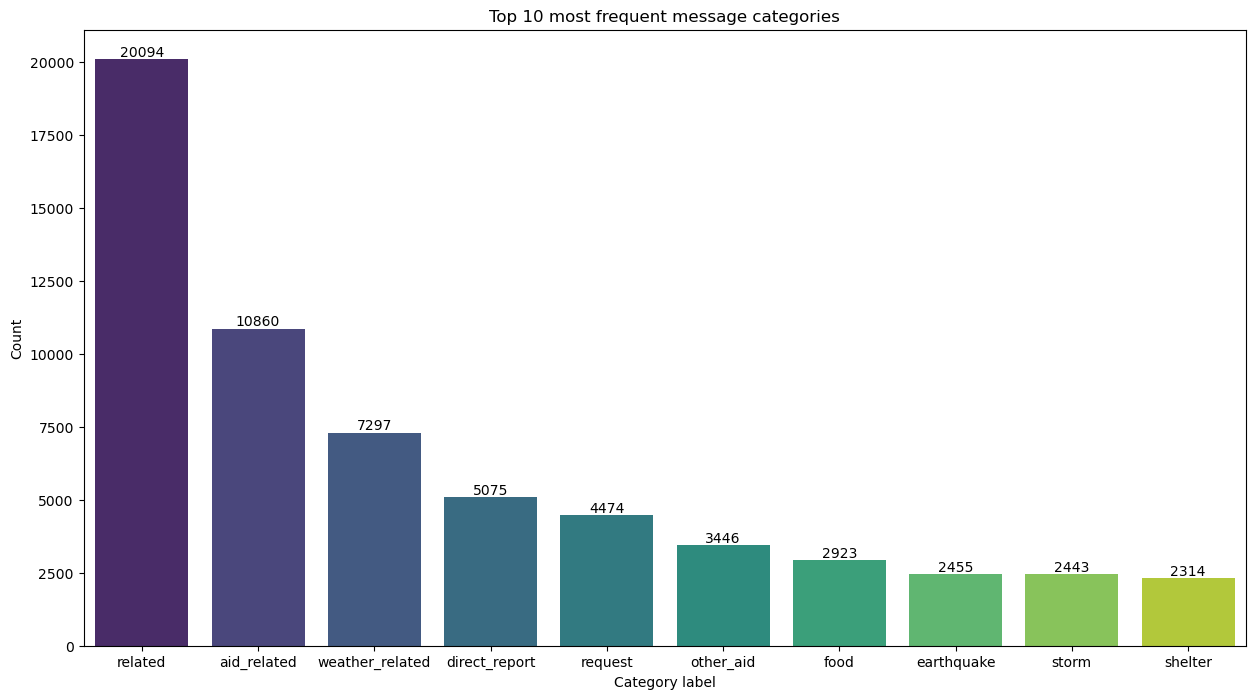

In [11]:
categories = dataset.columns[3:]
messages_per_category = (dataset[categories] == 1).sum().sort_values(ascending=False)
print("Messages assigned to an individual category:")
display(messages_per_category)
print("Total count of label assignments")
display(messages_per_category.sum())
plt.figure(figsize=(15,8))
ax = sns.barplot(x = messages_per_category[:10].index, y = messages_per_category[:10].values, hue = messages_per_category[:10].index, palette="viridis")
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.ylabel("Count")
plt.xlabel("Category label")
plt.title("Top 10 most frequent message categories")
plt.show()

### Histogram of the number of unique categories per message

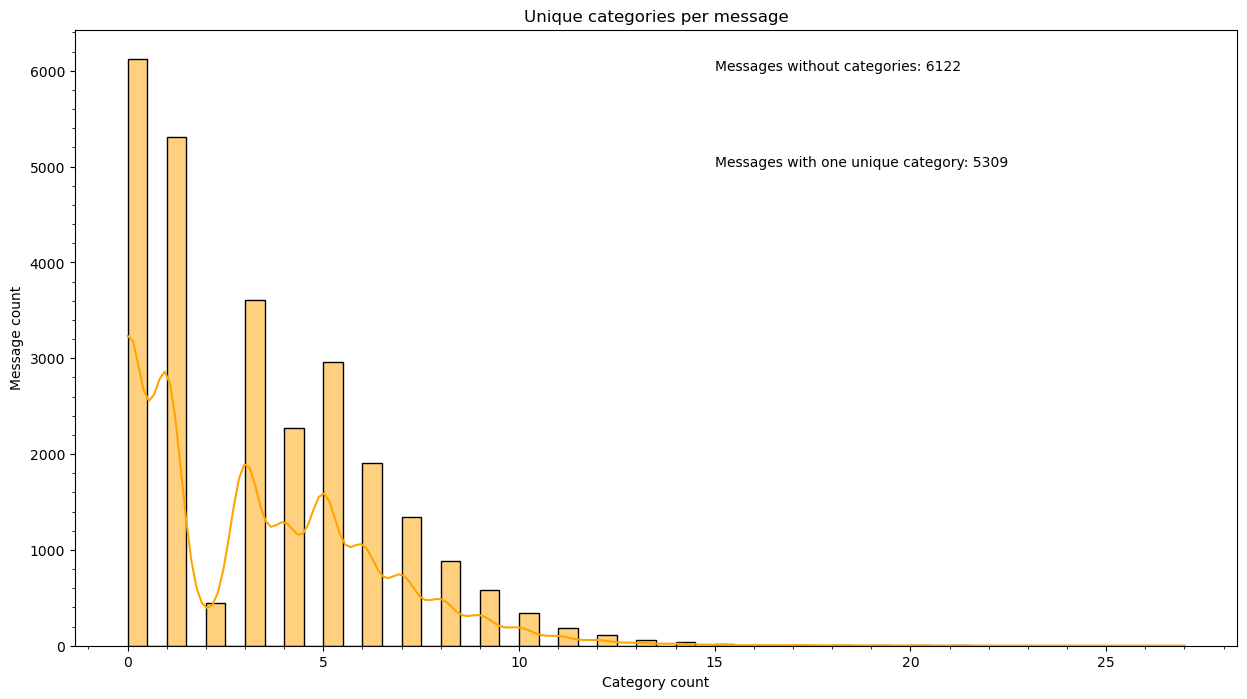

In [12]:
categories_per_message = dataset[categories].sum(axis=1)
plt.figure(figsize=(15,8))
ax = sns.histplot(categories_per_message, kde=True, binwidth=0.5, color = "orange")
plt.ylabel("Message count")
plt.xlabel("Category count")
plt.title("Unique categories per message")
ax.text(15, 6000, f"Messages without categories: {(categories_per_message == 0).sum()}")
ax.text(15, 5000, f"Messages with one unique category: {(categories_per_message == 1).sum()}")
plt.minorticks_on()
plt.show()

We can see that ~20% of dataset messages are not assigned to any category, those are messages which are marked as not "related", and about 20% more of dataset is assigned only to disaster "related" but miss any other specifying category label, also five top category labels: related, aid_related, weather_related, direct_report, request, other_aid correspond to about half of category markings. About 40% of messages is marked to aid_related and about 25% is weather_related, so we definitely see that there are two dominant specifiying categories.

In [13]:
print("Couple of messasges without any category label: ")
display(dataset.loc[categories_per_message == 0, :].head(5))
print("Couple of messasges with only one category label: ")
display(dataset.loc[categories_per_message == 1, :].head(5))
print(dataset.loc[categories_per_message == 1, :]["related"].sum())

Couple of messasges without any category label: 


,id,message,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
5,14,Information about the National Palace-,direct,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,17,"I would like to receive the messages, thank you",direct,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,21,I am in Petionville. I need more information r...,direct,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,28,are you going to call me or do you want me to ...,direct,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,30,I don't understand how to use this thing 4636.,direct,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Couple of messasges with only one category label: 


,id,message,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,Looking for someone but no name,direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,25,More information on the 4636 number in order f...,direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,32,I would like to know if one of the radio ginen...,direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


5309


## Text Cleaning and Preprocessing 

In [14]:
import regex as re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize

wnl = WordNetLemmatizer()
stopwords = stopwords.words("english")

#pattern to match different urls, or hashtags or mentions, or numbers, or punctuation or underscores
garbage_pattern = re.compile(r'(https?://\S+|https?\s\S*|www\.\S+|\bhttps?\b)|[@#]\w+|\d+|[^\w\s]|_')

def text_preprocessor(s: str):
    s = s.lower()              
    #replaces matching stuff with whitespace                 
    s = garbage_pattern.sub(' ', s)
    #cllapses whitespaces and removes trailing, starting whitespaces                
    s = re.sub(r'\s+', ' ', s).strip() 
    s = word_tokenize(s)
    s = [wnl.lemmatize(w) for w in s if w not in stopwords]
    return s

dataset["clean_text"] = dataset["message"].apply(text_preprocessor)

Couple of clean messages

In [15]:
for i in range(5):
    print(dataset["clean_text"][i])

['weather', 'update', 'cold', 'front', 'cuba', 'could', 'pas', 'haiti']
['hurricane']
['looking', 'someone', 'name']
['un', 'report', 'leogane', 'destroyed', 'hospital', 'st', 'croix', 'functioning', 'need', 'supply', 'desperately']
['say', 'west', 'side', 'haiti', 'rest', 'country', 'today', 'tonight']


In [16]:
display(dataset.head(5))

,id,message,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,...,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,clean_text
0,2,Weather update - a cold front from Cuba that c...,direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[weather, update, cold, front, cuba, could, pa..."
1,7,Is the Hurricane over or is it not over,direct,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,[hurricane]
2,8,Looking for someone but no name,direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[looking, someone, name]"
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,"[un, report, leogane, destroyed, hospital, st,..."
4,12,"says: west side of Haiti, rest of the country ...",direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[say, west, side, haiti, rest, country, today,..."


In [17]:
import joblib as jbl
jbl.dump(dataset, "preprocessed_df.pkl")

['preprocessed_df.pkl']